In [ ]:

import keras
dir(keras)

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'dtensor',
 'estimator',
 'experimental',
 'export',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'protobuf',
 'regularizers',
 'saving',
 'src',
 'utils']

#data creation


In [ ]:
from keras import Sequential
from keras.layers import Dense

In [ ]:
dir(keras.layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'CategoryEncoding',
 'CenterCrop',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM1D',
 'ConvLSTM2D',
 'ConvLSTM3D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv1D',
 'DepthwiseConv2D',
 'Discretization',
 'Dot',
 'Dropout',
 'ELU',
 'EinsumDense',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPo

In [ ]:
model=Sequential()
model.add(Dense(2))


In [ ]:
from keras.utils import plot_model

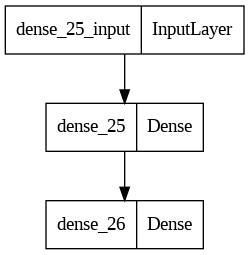

In [ ]:
model=Sequential()
model.add(Dense(5,input_dim=2))
model.add(Dense(1))
plot_model(model,to_file="mlp.png")

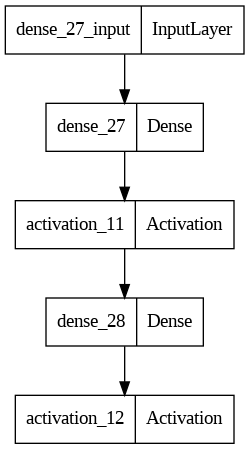

In [ ]:
from keras.layers import Activation
model=Sequential()
model.add(Dense(5,input_dim=2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
plot_model(model,to_file="mlp1.png")

2)compile network

In [ ]:
print(dir(keras.optimizers))
from keras.optimizers import Adam
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])

['Adadelta', 'Adafactor', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'Ftrl', 'Lion', 'Nadam', 'Optimizer', 'RMSprop', 'SGD', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'deserialize', 'experimental', 'get', 'legacy', 'schedules', 'serialize']


3)3 fit network

In [ ]:
history=model.fit(x,y,batch_size=10,epochs=100)

NameError: name 'x' is not defined

4)evaluate network


In [ ]:
loss,accuracy=model.evaluate(x,y,verbose=0/1/2) #choose either 1 or 2 or 0

5)prediction



In [ ]:
predection=model.prediction(x)
prediction=model.predict_classes(x)

standard network models:
  model has 10input layers,3 hidden layers

In [ ]:
model=Sequential()
model.add(Dense(10,input_dim=10))
model.add(Activation("relu"))
model.add(Dense(20))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))
plot_model(model,to_file="mlp3.png")
model.summary()

In [ ]:
plot_model(model,to_file="mlp3.png")

The model receives black and white 64*64 images as input ,then has a sequence of two convolutional and pooling layers as feature extraction,followed by a fully convoluted layer to interpret the features and an output layer with a sigmoid activation for two class predictions


In [ ]:
from keras.layers import Conv2D,MaxPooling2D,Flatten
model=Sequential()
model.add(Conv2D(32,(4,4),padding='same',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D())
model.add(Conv2D(16,(4,4),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
plot_model(model,to_file="cnn.png")


In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Flatten
from keras.utils import to_categorical,plot_model

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print('Train',x_train.shape,y_train.shape)
print('Test',x_test.shape,y_test.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
datagen=ImageDataGenerator(rescale=1/255)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1).astype('float32')
train_iterator=datagen.flow(x_train,y_train,batch_size=64)
test_iterator=datagen.flow(x_test,y_test,batch_size=64)

In [ ]:
import matplotlib.pyplot as plt

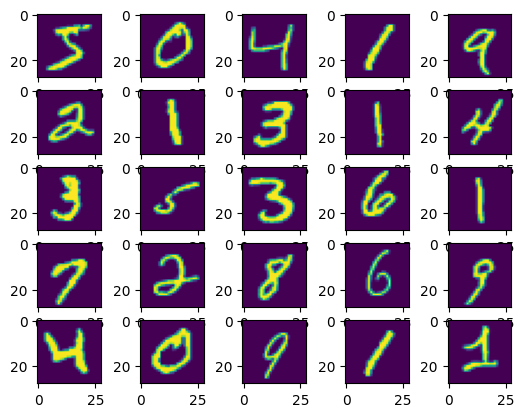

In [ ]:
for i in range(25):
  plt.Figure()
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])

In [ ]:
model=Sequential()
model.add(Conv2D(64,(5,5),strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 9216)              0         
                                                                 
 dense_29 (Dense)            (None, 100)               921700    
                                                                 
 dense_30 (Dense)            (None, 10)                1010      
                                                                 
Total params: 924374 (3.53 MB)
Trainable params: 924374 (3.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

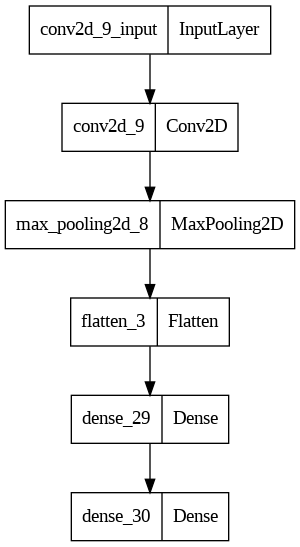

In [ ]:
plot_model(model,to_file="cnn1.png")

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_iterator,steps_per_epoch=10,validation_data=test_iterator,epochs=100,callbacks=[early_stop])

Epoch 1/100
10/10 [==============================] - 4s 106ms/step - loss: 1.8289 - accuracy: 0.4688 - val_loss: 1.0908 - val_accuracy: 0.7708
Epoch 2/100
10/10 [==============================] - 1s 82ms/step - loss: 0.7791 - accuracy: 0.7922 - val_loss: 0.5323 - val_accuracy: 0.8489
Epoch 3/100
10/10 [==============================] - 1s 147ms/step - loss: 0.4705 - accuracy: 0.8547 - val_loss: 0.4199 - val_accuracy: 0.8776
Epoch 4/100
10/10 [==============================] - 1s 81ms/step - loss: 0.4320 - accuracy: 0.8656 - val_loss: 0.3737 - val_accuracy: 0.8897
Epoch 5/100
10/10 [==============================] - 1s 147ms/step - loss: 0.4390 - accuracy: 0.8891 - val_loss: 0.3832 - val_accuracy: 0.8885
Epoch 6/100
10/10 [==============================] - 1s 98ms/step - loss: 0.4063 - accuracy: 0.8734 - val_loss: 0.2852 - val_accuracy: 0.9197
Epoch 7/100
10/10 [==============================] - 1s 80ms/step - loss: 0.3390 - accuracy: 0.9000 - val_loss: 0.2947 - val_accuracy: 0.9185
Epo

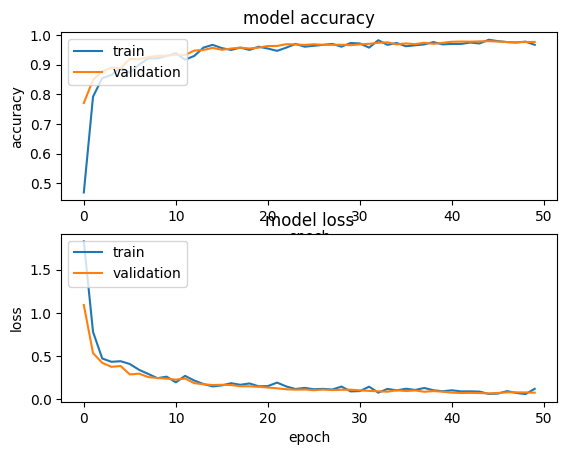

In [ ]:
plt.Figure()
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


In [ ]:
loss,accuracy=model.evaluate(x_train,y_train,verbose=1)

1875/1875 [==============================] - 6s 3ms/step - loss: 13.8145 - accuracy: 0.9731
